In [169]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [170]:
# XOR dataset
X = np.array([
    [2.5, 1.5],
    [1.9, 2.3],
    [-2.0, 1.1],
    [-1.3, 1.9],
    [-3.7, -1.34],
    [-1.3, -2.1],
    [2.1, -2.1],
    [1.34, -1.92]
], dtype = np.float32)
y = torch.tensor([[
    1.0, 1,
    0, 0,
    1, 1,
    0, 0
]]).T

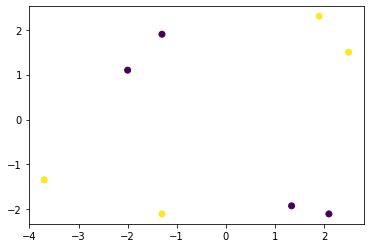

In [171]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [173]:
class XorClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(XorClassifier, self).__init__()
        self.input = torch.nn.Linear(input_dim, hidden_dim)
        self.output = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.input(x)
        x = torch.sigmoid(x)
        x = self.output(x)
        return torch.sigmoid(x)

In [172]:
def test_mesh():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    xx, yy = np.meshgrid(x, y)
    dim = x.shape
    mesh_flat = np.array([xx.flatten(), yy.flatten()], dtype=np.float32)
    mesh_input = torch.from_numpy(mesh_flat)
    return x, y, mesh_input

In [174]:
import matplotlib.pylab

def train(model, criterion, optimizer, X, y, iter=1000, plot=False):

    loss = []
    img = []
    for epoch in range(iter):
        y_hat = model(X)
        err = criterion(y_hat, y)
        err.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 20 == 0:
            loss.append(float(err.item()))
        if (epoch+1) % 500 == 0:
            print(f"Epoch: {epoch} completed, error {err}")
        if plot:
            if epoch % 1000 == 0:
                tx, ty, mesh_input = test_mesh()
                ty_hat = model(mesh_input.T)
                tz = np.reshape(ty_hat.detach().numpy(), (100, 100))
                fig = plt.figure(figsize=(14,10))
                plt.contourf(tx, ty, tz)
                fig.tight_layout(pad=0)
                fig.canvas.draw()
                data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
                data = data.reshape(fig.canvas.get_width_height()[::-1]+(3,))
                img.append(data)
                plt.close()
        if err < 1e-2:
            break
    return loss, img

In [175]:
import matplotlib.animation as ani

In [176]:
model = XorClassifier(2, 4, 1)
crit = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
X_tensor = torch.from_numpy(X)
y_hat = model(X_tensor)
l, imgs = train(model, crit, optimizer, X_tensor, y, 200000, True)

Epoch: 499 completed, error 0.6961190104484558
Epoch: 999 completed, error 0.692526638507843
Epoch: 1499 completed, error 0.6894615292549133
Epoch: 1999 completed, error 0.686320424079895
Epoch: 2499 completed, error 0.6827754974365234
Epoch: 2999 completed, error 0.6785333156585693
Epoch: 3499 completed, error 0.673277735710144
Epoch: 3999 completed, error 0.6666739583015442
Epoch: 4499 completed, error 0.6584251523017883
Epoch: 4999 completed, error 0.6483460068702698
Epoch: 5499 completed, error 0.6364163756370544
Epoch: 5999 completed, error 0.6227858066558838
Epoch: 6499 completed, error 0.6077278256416321
Epoch: 6999 completed, error 0.5915595293045044
Epoch: 7499 completed, error 0.5745518803596497
Epoch: 7999 completed, error 0.5568522214889526
Epoch: 8499 completed, error 0.5384199023246765
Epoch: 8999 completed, error 0.5189829468727112
Epoch: 9499 completed, error 0.49803006649017334
Epoch: 9999 completed, error 0.47489720582962036
Epoch: 10499 completed, error 0.44904419779

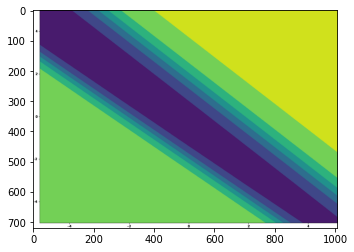

In [177]:
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"
fig = plt.figure()
im = plt.imshow(imgs[0], animated=True)
mi = 0
def updatefig(*args):
    global mi
    if mi < len(imgs)-1:
        mi += 1
    else:
        mi = 0
    im.set_array(imgs[mi])
    return im,

a = ani.FuncAnimation(fig, updatefig, blit=True)
a

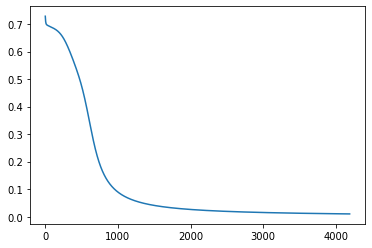

In [178]:
plt.plot(l)

In [160]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)
dim = x.shape

In [161]:
mesh_flat = np.array([xx.flatten(), yy.flatten()], dtype=np.float32)
mesh_input = torch.from_numpy(mesh_flat)

In [162]:
y_hat = model(mesh_input.T)

In [163]:
mesh_input

tensor([[-5.0000, -4.8990, -4.7980,  ...,  4.7980,  4.8990,  5.0000],
        [-5.0000, -5.0000, -5.0000,  ...,  5.0000,  5.0000,  5.0000]])

In [164]:
z = np.reshape(y_hat.detach().numpy(), (100, 100))

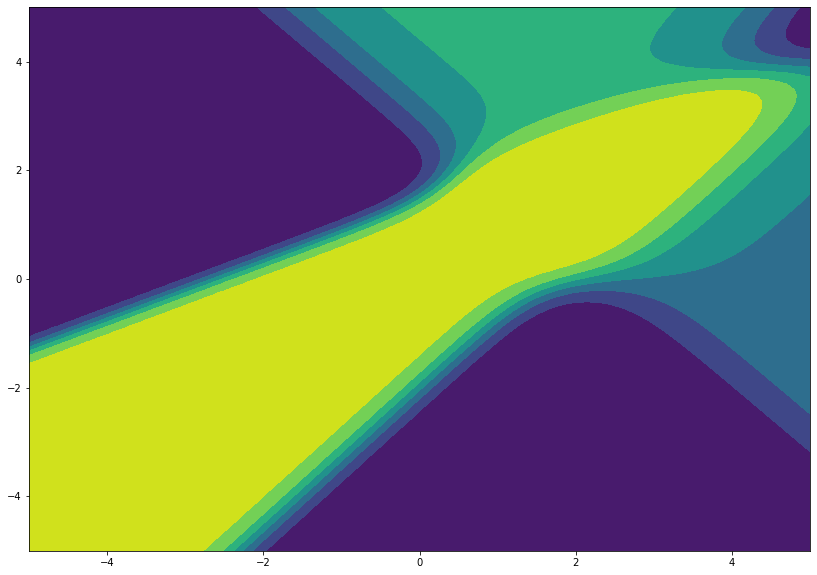

In [165]:
plt.figure(figsize=(14,10))
plt.contourf(x, y, z)

In [166]:
z

array([[0.99067384, 0.9906064 , 0.9905229 , ..., 0.00558377, 0.00605869,
        0.0066746 ],
       [0.9907161 , 0.990659  , 0.9905882 , ..., 0.00596553, 0.00655338,
        0.00732094],
       [0.990752  , 0.99070346, 0.99064344, ..., 0.00643777, 0.00716947,
        0.00813161],
       ...,
       [0.00898952, 0.00901354, 0.0090432 , ..., 0.13609003, 0.10288723,
        0.07616524],
       [0.00900891, 0.00903748, 0.00907276, ..., 0.15518597, 0.11790006,
        0.08707043],
       [0.00903198, 0.00906595, 0.00910792, ..., 0.17905481, 0.1378403 ,
        0.10262167]], dtype=float32)